<a href="https://colab.research.google.com/github/maberf/colabs/blob/main/DerivativosEx2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# importação dos pacotes
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random

In [17]:
# inputs - variáveis e valores
to = 0
so = 100 # valor do underlying
mi = 0.20 # valor de média em numérico de %
sigma = 0.30 # valor da volatilidade em numérico de %
t = 1 # período em anos

In [18]:
# parâmetros adicionais para a simulação do exercício
dt = 1/252 # base dia para ano base 252
flows = 8 # quantidade de fluxos
#
data = {'N': range(t*(252+1))} # 1 incremento a mais para fecharo em ano(s)

In [19]:
# criação do dataframe
df = pd.DataFrame(data)
# carregamento da coluna com os incrementos de tempo
df['t'] = df['N'] * dt
# print(df)

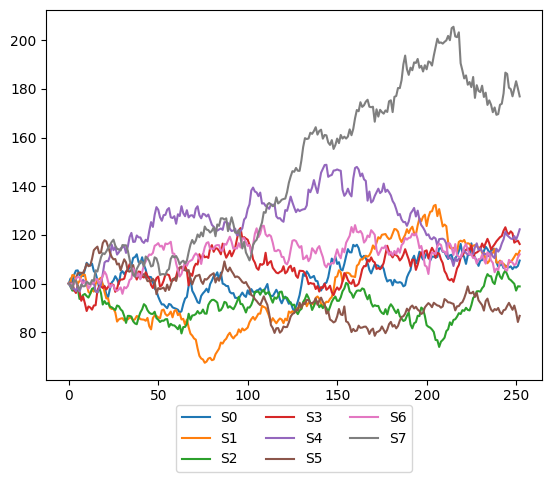

In [20]:
# recorrências aninhadas, fluxos e cálculos no dataframe
# fluxos
for s in range(0, flows):
    flow = 'S'+str(s)
    df[flow] = so
    df[flow] = df['S'+str(s)].astype(float)
    # recorrência do cálculo no dataframe
    for i in range(1, len(df)):
        st = df.iloc[i - 1, s+2]
        df.iloc[i, s+2] = st+mi*st*dt+sigma*st*stats.norm.ppf(random.random(), loc=0, scale=math.sqrt(dt))
    # plotagem dos fluxos
    plt.plot(df[flow], label=flow)
# acréscimo de legendas no gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
# print(df)